In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_orig = pd.read_csv('monthly-rainfall-data.csv')
data_orig.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2000,1.09,1.27,0.42,1.70,1.42,4.52,0.92,0.00,1.90,7.26,0.00,1.10
1,2001,3.94,1.01,2.78,4.09,4.63,0.83,0.00,6.24,3.87,3.55,3.94,2.67
2,2002,0.39,0.39,1.54,2.43,1.29,0.00,7.79,1.08,6.87,7.11,2.38,3.74
3,2003,4.10,2.65,2.36,0.11,0.16,4.15,8.41,0.95,7.94,2.18,0.27,0.14
4,2004,2.65,1.77,4.31,8.58,2.61,10.28,2.57,4.72,1.44,4.94,7.50,0.07


In [3]:
data = pd.melt(data_orig,
               id_vars='Year',
               value_vars = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
               value_name='Rainfall')
data['Date'] = data['Year'].astype(str) + '-' + data['variable'].astype(str)
data.head()

,Year,variable,Rainfall,Date
0,2000,Jan,1.09,2000-Jan
1,2001,Jan,3.94,2001-Jan
2,2002,Jan,0.39,2002-Jan
3,2003,Jan,4.10,2003-Jan
4,2004,Jan,2.65,2004-Jan


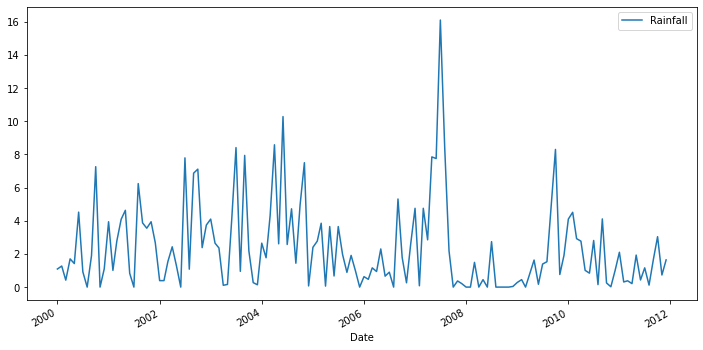

In [4]:
data['Date'] = pd.to_datetime(data['Date']) # convert date column to DateTime
ax = data.plot(x='Date', y='Rainfall', figsize=(12,6))

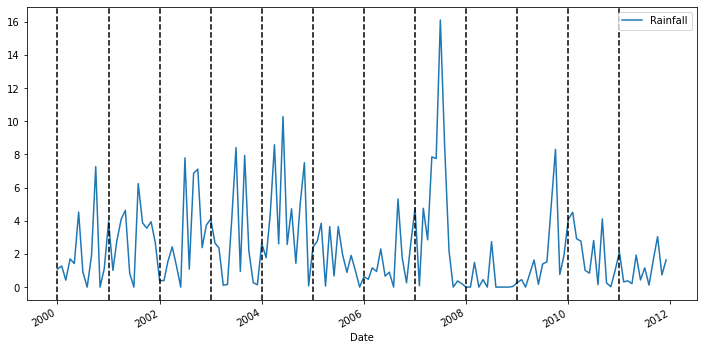

In [5]:
ax = data.plot(x='Date', y='Rainfall', figsize=(12,6))
xcoords = ['2000-01-01', '2001-01-01','2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
          '2006-01-01','2007-01-01','2008-01-01','2009-01-01','2010-01-01','2011-01-01']
for xc in xcoords:
    ax.axvline(x=xc, color='black', linestyle='--')

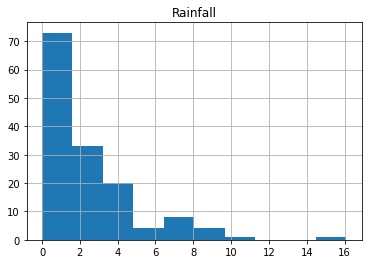

In [6]:
histogram = data.hist(column='Rainfall')


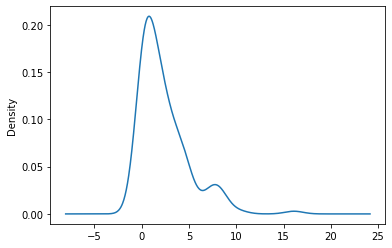

In [7]:
cdf = data['Rainfall'].plot.density()

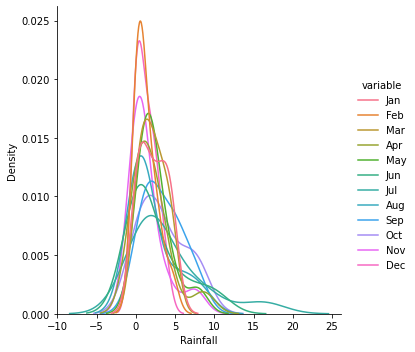

In [8]:
sns.displot(data=data, x="Rainfall", hue="variable", kind="kde");

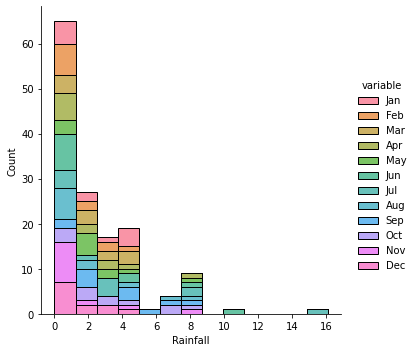

In [9]:
sns.displot(data=data, x="Rainfall", hue="variable", multiple='stack');

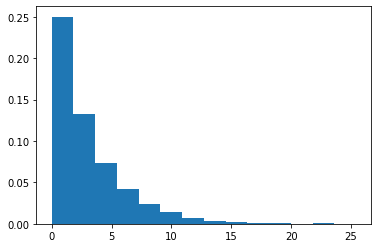

In [10]:
#Exponential Decay - Random Number

expo = np.random.exponential(3, 10000)
  
count, bins, ignored = plt.hist(expo, 14, density = True)
plt.show()

In [18]:

import numpy as np
import statistics

def SampleByMonth(month):
    if ( month == 0 ):
        d = data[data.variable == "Jan"]
        return d["Rainfall"].sample()
    if ( month == 1 ):
        d = data[data.variable == "Feb"]
        return d["Rainfall"].sample()
    if ( month == 2 ):
        d = data[data.variable == "Mar"]
        return d["Rainfall"].sample()
    if ( month == 3 ):
        d = data[data.variable == "Apr"]
        return d["Rainfall"].sample()
    if ( month == 4 ):
        d = data[data.variable == "May"]
        return d["Rainfall"].sample()
    if ( month == 5 ):
        d = data[data.variable == "Jun"]
        return d["Rainfall"].sample()
    if ( month == 6 ):
        d = data[data.variable == "Jul"]
        return d["Rainfall"].sample()
    if ( month == 7 ):
        d = data[data.variable == "Aug"]
        return d["Rainfall"].sample()
    if ( month == 8 ):
        d = data[data.variable == "Sep"]
        return d["Rainfall"].sample()
    if ( month == 9 ):
        d = data[data.variable == "Oct"]
        return d["Rainfall"].sample()
    if ( month == 10 ):
        d = data[data.variable == "Nov"]
        return d["Rainfall"].sample()
    if ( month == 11 ):
        d = data[data.variable == "Dec"]
        return d["Rainfall"].sample()

    return 2.356    

# return a random value from our data sample
def DirectSample():
    x = data['Rainfall'].sample()
    return x

rainfallStd = data['Rainfall'].std()
rainfall_mean = data['Rainfall'].mean()

print("sample variance = ")
print(rainfallStd)
print("sample mean = ")
print(rainfall_mean)

num_simulations = 250
num_months = 12

simulation_df = pd.DataFrame()
completeSeries = []

for x in range(num_simulations):
    count = 0
    
    rainfall_series = []

    for y in range(num_months):
        if count == num_months:
            break
        # rainfall = SampleByMonth(y)
        rainfall = DirectSample()
        completeSeries.append(rainfall.iloc[0])
        rainfall_series.append(rainfall)
        count += 1

    simulation_df[x] = rainfall_series

import statistics

simulation_std = statistics.pstdev(completeSeries)
simulation_mean = statistics.mean(completeSeries)

print("simulation variance = ")
print(simulation_std)
print("simulation mean = ")
print(simulation_mean)


sample variance = 
2.6255197583629033
sample mean = 
2.356111111111112


<ipython-input-18-3a2a3784e409>:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[x] = rainfall_series
<ipython-input-18-3a2a3784e409>:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[x] = rainfall_series
<ipython-input-18-3a2a3784e409>:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = f

simulation variance = 
2.6232588883973222
simulation mean = 
2.3512666666666666
